## Analysis Plan
## Mariam Sedrakyan 

For my second step, I collected all the data I needed in order to complete my final project. The motivation of my project is to compare and contrast the changes in the taste of hot music in America. Below, I will present some data frames that I will use later to analyze my hypothesis.

For my third step, I would like to introduce my analysis plan. For my final project, I am going to analyze how music taste changed in America based on the __Danceability and speechiness__ over the past 20 years. To visualize my data, I will use boxplot and scatter. 

In [1]:
from matplotlib import pyplot as plt
from scipy import stats
import pandas as pd
import numpy as np
import requests
import base64
import json
import urllib

In [2]:
Client_ID = pd.read_csv("Spotify-Keys_9-23-21.txt")['Client_ID'].iloc[0]
Client_Secret = pd.read_csv("Spotify-Keys_secret.txt")['Client_Secret'].iloc[0]

In [3]:
# Client_ID

In [4]:
# Client_Secret

In [5]:
client_cred = base64.b64encode(str(Client_ID + ":" + Client_Secret).encode("ascii"))

In [6]:
# client_cred

In [7]:
headers = {"Authorization": "Basic {}".format(client_cred.decode("ascii"))}

In [8]:
# headers

In [9]:
payload = {'grant_type' : 'client_credentials'}
url = 'https://accounts.spotify.com/api/token'

In [10]:
session_key_response = requests.post(url = url, data = payload, headers = headers)

In [11]:
session_key_response.status_code

200

In [12]:
# session_key_response.json()['access_token']

In [13]:
session_header_key = session_key_response.json()

In [14]:
key = session_header_key['access_token']

In [15]:
session_headers = {"Authorization": "Bearer {}".format(key)}

In [16]:
# session_headers

# Hits of early 2000s

First playlist is has all the popular songs early 2000s

In [17]:
early_hits_id="37i9dQZF1DWUZv12GM5cFk"

In [18]:
early_hits_url= 'https://api.spotify.com/v1/playlists/{}'.format(early_hits_id)

In [19]:
early_hits_response = requests.get(url = early_hits_url, headers = session_headers)
early_hits_response.status_code

200

In [20]:
early_hits = early_hits_response.json()

In [21]:
early_hits.keys()

dict_keys(['collaborative', 'description', 'external_urls', 'followers', 'href', 'id', 'images', 'name', 'owner', 'primary_color', 'public', 'snapshot_id', 'tracks', 'type', 'uri'])

In [22]:
early_hits['tracks'].keys()

dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])

In [23]:
early_hits['tracks'].keys()

dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])

In [24]:
early_hits['tracks']['items'][0]['track']['album']['release_date']

'2000-05-16'

creating dataframe to get the popularity and id's of the tracks

In [25]:
early_hits_df = pd.DataFrame([x['track'] for x in early_hits['tracks']['items']])
early_hits_df.head(2)

,album,artists,available_markets,disc_number,duration_ms,episode,explicit,external_ids,external_urls,href,id,is_local,name,popularity,preview_url,track,track_number,type,uri
0,"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,"[AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, C...",1,211160,False,False,{'isrc': 'USJI10000100'},{'spotify': 'https://open.spotify.com/track/6n...,https://api.spotify.com/v1/tracks/6naxalmIoLFW...,6naxalmIoLFWR0siv8dnQQ,False,Oops!...I Did It Again,81,https://p.scdn.co/mp3-preview/66a5cf0f69b1bb1e...,True,1,track,spotify:track:6naxalmIoLFWR0siv8dnQQ
1,"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,"[AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, C...",1,167066,False,False,{'isrc': 'USMC19959123'},{'spotify': 'https://open.spotify.com/track/2m...,https://api.spotify.com/v1/tracks/2m1hi0nfMR9v...,2m1hi0nfMR9vdGC8UcrnwU,False,All The Small Things,84,None,True,8,track,spotify:track:2m1hi0nfMR9vdGC8UcrnwU


In [26]:
id_name_popularity_df =early_hits_df[['name','popularity','id','type']]

I seperated important the parts from graph to understand the popularity of tracks 

In [27]:
id_name_popularity_df.head(5)

,name,popularity,id,type
0,Oops!...I Did It Again,81,6naxalmIoLFWR0siv8dnQQ,track
1,All The Small Things,84,2m1hi0nfMR9vdGC8UcrnwU,track
2,Breathe,68,3y4LxiYMgDl4RethdzpmNe,track
3,It's My Life,82,0v1XpBHnsbkCn7iJ9Ucr1l,track
4,Bye Bye Bye,74,62bOmKYxYg7dhrC6gH9vFn,track


To get the date of the tracks, I need to look into the albums they were created. 

In [28]:
release_dates = pd.DataFrame([x['track']['album']for x in early_hits['tracks']['items']])
release_dates.head(2)

,album_type,artists,available_markets,external_urls,href,id,images,name,release_date,release_date_precision,total_tracks,type,uri
0,album,[{'external_urls': {'spotify': 'https://open.s...,"[AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, C...",{'spotify': 'https://open.spotify.com/album/5P...,https://api.spotify.com/v1/albums/5PmgtkodFl2O...,5PmgtkodFl2Om3hMXONDll,"[{'height': 640, 'url': 'https://i.scdn.co/ima...",Oops!... I Did It Again,2000-05-16,day,12,album,spotify:album:5PmgtkodFl2Om3hMXONDll
1,album,[{'external_urls': {'spotify': 'https://open.s...,"[AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, C...",{'spotify': 'https://open.spotify.com/album/65...,https://api.spotify.com/v1/albums/652N05EcNH1a...,652N05EcNH1a4bIlUixQE2,"[{'height': 640, 'url': 'https://i.scdn.co/ima...",Enema Of The State,1999-06-01,day,12,album,spotify:album:652N05EcNH1a4bIlUixQE2


Below we can see the albums released early 2000s. I will select the one that was realised the earliest 

In [29]:
album_dates_df=release_dates[['name','release_date','id','type']]
album_dates_df.head(5).sort_values('release_date',ascending = True)

,name,release_date,id,type
1,Enema Of The State,1999-06-01,652N05EcNH1a4bIlUixQE2,album
2,Breathe,1999-11-09,3BGPil8BDPVoDK0lnUPtvb,album
3,Crush,2000-01-01,0Q9SljCrM0CL0bR23MuP69,album
4,No Strings Attached,2000-03-21,20RMokVwJ2wjQ0s8FOdOFC,album
0,Oops!... I Did It Again,2000-05-16,5PmgtkodFl2Om3hMXONDll,album


In [30]:
get_old_albums_url = 'https://api.spotify.com/v1/albums?ids={}'\
.format(','.join(list(album_dates_df['id'] [0:20])))

In [31]:
old_album_features =requests.get(url = get_old_albums_url , headers = session_headers)
old_album_features.status_code

200

In [32]:
old_album_response = old_album_features.json()

In [33]:
old_album_response_df = pd.DataFrame(old_album_response['albums'])

In [34]:
old_albums_popularity_df= pd.DataFrame (old_album_response_df[['name','popularity','release_date','id','type']])
old_albums_popularity_df.head(6).sort_values('popularity',ascending = False)

,name,popularity,release_date,id,type
1,Enema Of The State,80,1999-06-01,652N05EcNH1a4bIlUixQE2,album
0,Oops!... I Did It Again,74,2000-05-16,5PmgtkodFl2Om3hMXONDll,album
3,Crush,73,2000-01-01,0Q9SljCrM0CL0bR23MuP69,album
4,No Strings Attached,71,2000-03-21,20RMokVwJ2wjQ0s8FOdOFC,album
5,Unleash The Dragon,65,1999-11-30,0nyora4kbjBGE4d1B9gxnm,album
2,Breathe,60,1999-11-09,3BGPil8BDPVoDK0lnUPtvb,album


My first graph visualizes popular albums from 1999 to 2013 based on their popularity. 

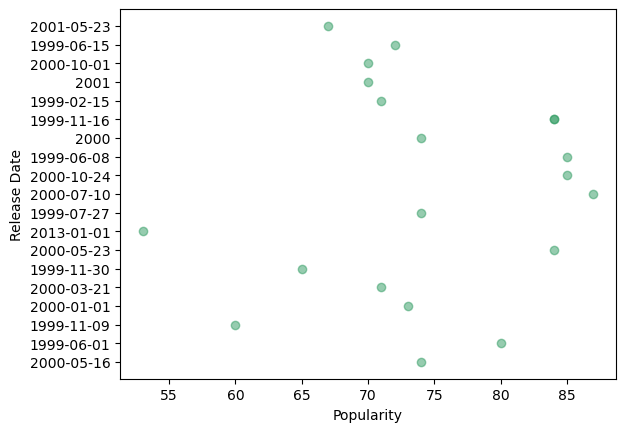

In [35]:
fig1, ax1 =  plt.subplots()
ax1.scatter( x = old_albums_popularity_df ['popularity'], 
             y = old_albums_popularity_df['release_date'],
            alpha= .5, color ="#2F9B61")

ax1.set_xlabel('Popularity')
ax1.set_ylabel('Release Date')
plt.show()

In [36]:
Enma_id="652N05EcNH1a4bIlUixQE2"

In [37]:
Enema_tracks_url = 'https://api.spotify.com/v1/albums/{}/tracks'.format(Enma_id)


In [38]:
Enema_album_response = requests.get(url = Enema_tracks_url, headers = session_headers)
Enema_album_response.status_code

200

In [39]:
Enema_of_the_state = Enema_album_response.json()

In [40]:
Enema_of_the_state.keys()

dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])

In [41]:
Enema_df = pd.DataFrame(Enema_of_the_state['items'])
Enema_df.head()

,artists,available_markets,disc_number,duration_ms,explicit,external_urls,href,id,is_local,name,preview_url,track_number,type,uri
0,[{'external_urls': {'spotify': 'https://open.s...,"[AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, C...",1,143893,True,{'spotify': 'https://open.spotify.com/track/5S...,https://api.spotify.com/v1/tracks/5SlKhaPcdIfS...,5SlKhaPcdIfSjpoM2QtM4C,False,Dumpweed,None,1,track,spotify:track:5SlKhaPcdIfSjpoM2QtM4C
1,[{'external_urls': {'spotify': 'https://open.s...,"[AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, C...",1,143573,False,{'spotify': 'https://open.spotify.com/track/1I...,https://api.spotify.com/v1/tracks/1IAeSajljaXA...,1IAeSajljaXAkLZKXBZnE8,False,Don't Leave Me,None,2,track,spotify:track:1IAeSajljaXAkLZKXBZnE8
2,[{'external_urls': {'spotify': 'https://open.s...,"[AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, C...",1,193000,False,{'spotify': 'https://open.spotify.com/track/3n...,https://api.spotify.com/v1/tracks/3nqm3DdVskqb...,3nqm3DdVskqbHhmb8S8hMd,False,Aliens Exist,None,3,track,spotify:track:3nqm3DdVskqbHhmb8S8hMd
3,[{'external_urls': {'spotify': 'https://open.s...,"[AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, C...",1,179333,False,{'spotify': 'https://open.spotify.com/track/4T...,https://api.spotify.com/v1/tracks/4TofVhKSYwFX...,4TofVhKSYwFXRtbYo5M3h4,False,Going Away To College,None,4,track,spotify:track:4TofVhKSYwFXRtbYo5M3h4
4,[{'external_urls': {'spotify': 'https://open.s...,"[AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, C...",1,148360,True,{'spotify': 'https://open.spotify.com/track/4L...,https://api.spotify.com/v1/tracks/4LJhJ6DQS7Nw...,4LJhJ6DQS7NwE7UKtvcM52,False,What's My Age Again?,None,5,track,spotify:track:4LJhJ6DQS7NwE7UKtvcM52


In [42]:
enema_name_df= pd.DataFrame(Enema_df [['name','id','type']])
enema_name_df.head()

,name,id,type
0,Dumpweed,5SlKhaPcdIfSjpoM2QtM4C,track
1,Don't Leave Me,1IAeSajljaXAkLZKXBZnE8,track
2,Aliens Exist,3nqm3DdVskqbHhmb8S8hMd,track
3,Going Away To College,4TofVhKSYwFXRtbYo5M3h4,track
4,What's My Age Again?,4LJhJ6DQS7NwE7UKtvcM52,track


In [43]:
Enema_audio_features = 'https://api.spotify.com/v1/audio-features?ids={}'\
.format(','.join(list(Enema_df['id'])))


In [44]:
Enema_features_response = requests.get(url = Enema_audio_features , headers = session_headers)
Enema_features_response.status_code

200

In [45]:
enema_features = Enema_features_response.json()

In [46]:
enema_features.keys()

dict_keys(['audio_features'])

In [47]:
enema_features_df = pd.DataFrame(enema_features['audio_features'])
enema_features_df.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.451,0.937,4,-5.524,1,0.0952,0.002440,0.000112,0.1480,0.591,100.601,audio_features,5SlKhaPcdIfSjpoM2QtM4C,spotify:track:5SlKhaPcdIfSjpoM2QtM4C,https://api.spotify.com/v1/tracks/5SlKhaPcdIfS...,https://api.spotify.com/v1/audio-analysis/5SlK...,143893,4
1,0.343,0.940,9,-7.094,1,0.0907,0.008620,0.000005,0.3040,0.243,145.513,audio_features,1IAeSajljaXAkLZKXBZnE8,spotify:track:1IAeSajljaXAkLZKXBZnE8,https://api.spotify.com/v1/tracks/1IAeSajljaXA...,https://api.spotify.com/v1/audio-analysis/1IAe...,143573,4
2,0.470,0.915,11,-6.787,1,0.1000,0.000954,0.000008,0.3500,0.690,107.569,audio_features,3nqm3DdVskqbHhmb8S8hMd,spotify:track:3nqm3DdVskqbHhmb8S8hMd,https://api.spotify.com/v1/tracks/3nqm3DdVskqb...,https://api.spotify.com/v1/audio-analysis/3nqm...,193000,4
3,0.532,0.753,11,-6.481,1,0.0322,0.010500,0.000000,0.3890,0.575,104.522,audio_features,4TofVhKSYwFXRtbYo5M3h4,spotify:track:4TofVhKSYwFXRtbYo5M3h4,https://api.spotify.com/v1/tracks/4TofVhKSYwFX...,https://api.spotify.com/v1/audio-analysis/4Tof...,179333,4
4,0.391,0.951,6,-7.419,1,0.0692,0.012600,0.000378,0.0878,0.468,157.660,audio_features,4LJhJ6DQS7NwE7UKtvcM52,spotify:track:4LJhJ6DQS7NwE7UKtvcM52,https://api.spotify.com/v1/tracks/4LJhJ6DQS7Nw...,https://api.spotify.com/v1/audio-analysis/4LJh...,148360,4


In [48]:
enema_two_features_df= pd.DataFrame(enema_features_df[['danceability','speechiness','id']])
enema_two_features_df.head()

,danceability,speechiness,id
0,0.451,0.0952,5SlKhaPcdIfSjpoM2QtM4C
1,0.343,0.0907,1IAeSajljaXAkLZKXBZnE8
2,0.470,0.1000,3nqm3DdVskqbHhmb8S8hMd
3,0.532,0.0322,4TofVhKSYwFXRtbYo5M3h4
4,0.391,0.0692,4LJhJ6DQS7NwE7UKtvcM52


In [49]:
enema_final_df= pd.merge(enema_name_df, enema_two_features_df, how = 'inner', on = 'id')
enema_final_df.head()

,name,id,type,danceability,speechiness
0,Dumpweed,5SlKhaPcdIfSjpoM2QtM4C,track,0.451,0.0952
1,Don't Leave Me,1IAeSajljaXAkLZKXBZnE8,track,0.343,0.0907
2,Aliens Exist,3nqm3DdVskqbHhmb8S8hMd,track,0.470,0.1000
3,Going Away To College,4TofVhKSYwFXRtbYo5M3h4,track,0.532,0.0322
4,What's My Age Again?,4LJhJ6DQS7NwE7UKtvcM52,track,0.391,0.0692


My next graph represents the picked album's danceability vs speechiness. As we can see, a popular album from the early 2000s could have been more danceable, with low speeches.

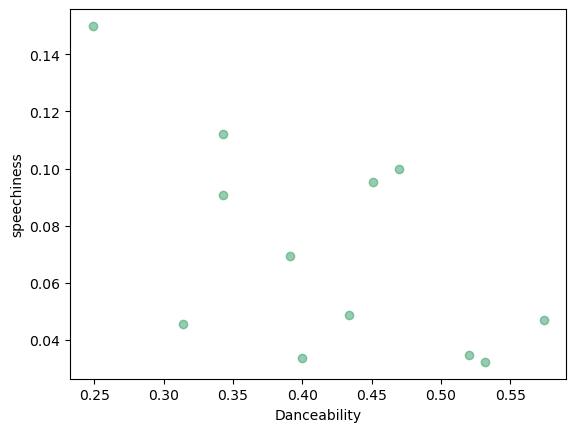

In [50]:
fig4, ax4 =  plt.subplots()
ax4.scatter( x = enema_final_df ['danceability'], 
             y = enema_final_df['speechiness'],alpha= .5, color ="#2F9B61" )

ax4.set_xlabel('Danceability')
ax4.set_ylabel('speechiness')
plt.show()

to get more information about tracks I used audio-features endpoint. This will help me to understand what type of tracks people liked back in 2000s

### I will repeat the same process again with new playlist 

# Hits of 2022

### I repeated the first two graph for songs and album from 2022 

In [51]:
new_id= "56r5qRUv3jSxADdmBkhcz7"

In [52]:
new_playlist_url = 'https://api.spotify.com/v1/playlists/{}'.format(new_id)

In [53]:
new_playlist_url_response = requests.get(url = new_playlist_url, headers = session_headers)


In [54]:
new_playlist_url_data=new_playlist_url_response.json()

In [55]:
new_playlist_url_data.keys()

dict_keys(['collaborative', 'description', 'external_urls', 'followers', 'href', 'id', 'images', 'name', 'owner', 'primary_color', 'public', 'snapshot_id', 'tracks', 'type', 'uri'])

In [56]:
new_playlist_df = pd.DataFrame([x['track'] for x in new_playlist_url_data['tracks']['items']])
new_playlist_df.head(2)

,album,artists,available_markets,disc_number,duration_ms,episode,explicit,external_ids,external_urls,href,id,is_local,name,popularity,preview_url,track,track_number,type,uri
0,"{'album_type': 'single', 'artists': [{'externa...",[{'external_urls': {'spotify': 'https://open.s...,[],1,167303,False,False,{'isrc': 'USSM12200612'},{'spotify': 'https://open.spotify.com/track/4L...,https://api.spotify.com/v1/tracks/4LRPiXqCikLl...,4LRPiXqCikLlN15c3yImP7,False,As It Was,60,None,True,1,track,spotify:track:4LRPiXqCikLlN15c3yImP7
1,"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,"[AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, C...",1,200690,False,False,{'isrc': 'USUG12205736'},{'spotify': 'https://open.spotify.com/track/0V...,https://api.spotify.com/v1/tracks/0V3wPSX9ygBn...,0V3wPSX9ygBnCm8psDIegu,False,Anti-Hero,92,None,True,3,track,spotify:track:0V3wPSX9ygBnCm8psDIegu


In [57]:
new_release_dates = pd.DataFrame([x['track']['album']for x in new_playlist_url_data['tracks']['items']])
new_release_dates.head()

,album_type,artists,available_markets,external_urls,href,id,images,name,release_date,release_date_precision,total_tracks,type,uri
0,single,[{'external_urls': {'spotify': 'https://open.s...,[],{'spotify': 'https://open.spotify.com/album/2p...,https://api.spotify.com/v1/albums/2pqdSWeJVsXA...,2pqdSWeJVsXAhHFuVLzuA8,"[{'height': 640, 'url': 'https://i.scdn.co/ima...",As It Was,2022-03-31,day,1,album,spotify:album:2pqdSWeJVsXAhHFuVLzuA8
1,album,[{'external_urls': {'spotify': 'https://open.s...,"[AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, C...",{'spotify': 'https://open.spotify.com/album/15...,https://api.spotify.com/v1/albums/151w1FgRZfnK...,151w1FgRZfnKZA9FEcg9Z3,"[{'height': 640, 'url': 'https://i.scdn.co/ima...",Midnights,2022-10-21,day,13,album,spotify:album:151w1FgRZfnKZA9FEcg9Z3
2,album,[{'external_urls': {'spotify': 'https://open.s...,[],{'spotify': 'https://open.spotify.com/album/0K...,https://api.spotify.com/v1/albums/0KTj6k94XZh0...,0KTj6k94XZh0c6IEMfxeWV,"[{'height': 640, 'url': 'https://i.scdn.co/ima...",Dreamland (+ Bonus Levels),2020-08-06,day,18,album,spotify:album:0KTj6k94XZh0c6IEMfxeWV
3,single,[{'external_urls': {'spotify': 'https://open.s...,"[AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, C...",{'spotify': 'https://open.spotify.com/album/0g...,https://api.spotify.com/v1/albums/0gX9tkL5njRa...,0gX9tkL5njRax8ymWcXARi,"[{'height': 640, 'url': 'https://i.scdn.co/ima...",Unholy (feat. Kim Petras),2022-09-22,day,1,album,spotify:album:0gX9tkL5njRax8ymWcXARi
4,album,[{'external_urls': {'spotify': 'https://open.s...,"[AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, C...",{'spotify': 'https://open.spotify.com/album/3R...,https://api.spotify.com/v1/albums/3RQQmkQEvNCY...,3RQQmkQEvNCY4prGKE6oc5,"[{'height': 640, 'url': 'https://i.scdn.co/ima...",Un Verano Sin Ti,2022-05-06,day,23,album,spotify:album:3RQQmkQEvNCY4prGKE6oc5


In [58]:
new_albums_dates= pd.DataFrame (new_release_dates[['name','release_date','id','type']])
new_albums_dates.head(5).sort_values('release_date',ascending = False)

,name,release_date,id,type
1,Midnights,2022-10-21,151w1FgRZfnKZA9FEcg9Z3,album
3,Unholy (feat. Kim Petras),2022-09-22,0gX9tkL5njRax8ymWcXARi,album
4,Un Verano Sin Ti,2022-05-06,3RQQmkQEvNCY4prGKE6oc5,album
0,As It Was,2022-03-31,2pqdSWeJVsXAhHFuVLzuA8,album
2,Dreamland (+ Bonus Levels),2020-08-06,0KTj6k94XZh0c6IEMfxeWV,album


In [59]:
get_new_albums_url = 'https://api.spotify.com/v1/albums?ids={}'\
.format(','.join(list(new_albums_dates['id'] [0:20])))

In [60]:
get_new_albums_url

'https://api.spotify.com/v1/albums?ids=2pqdSWeJVsXAhHFuVLzuA8,151w1FgRZfnKZA9FEcg9Z3,0KTj6k94XZh0c6IEMfxeWV,0gX9tkL5njRax8ymWcXARi,3RQQmkQEvNCY4prGKE6oc5,6FJxoadUE4JNVwWHghBwnb,3OYnManu1Nlxnw9OMng7BH,6ZZvx0aefZV3LKa053fn71,6tUQPKlpR4x1gjrXTtOImI,3Ks0eeH0GWpY4AU20D5HPD,4PNqWiJAfjj32hVvlchV5u,4uVXrwE4aSV2L2aqAHSOXa,5dGWwsZ9iB2Xc3UKR0gif2,4JApkbiesQxv5drdEZRlZC,5r36AJ6VOJtp00oxSkBZ5h,6s84u2TUpR3wdUv4NgKA2j,3RQQmkQEvNCY4prGKE6oc5,0h5MuD9O9o1VoN07mQmwMQ,622NFw5Yk0OReMJ2XWcXUh,5omNd3Mkij9C3ZeW19rRmv'

In [61]:
new_album_features =requests.get(url = get_new_albums_url , headers = session_headers)
new_album_features.status_code

200

In [62]:
new_album_response = new_album_features.json()

In [63]:
new_album_response.keys()

dict_keys(['albums'])

In [64]:
new_album_response_df = pd.DataFrame(new_album_response['albums'])

In [65]:
new_albums_popularity_df= pd.DataFrame (new_album_response_df[['name','popularity','release_date','id','type']])
new_albums_popularity_df.head(6).sort_values('popularity',ascending = False)

,name,popularity,release_date,id,type
4,Un Verano Sin Ti,94,2022-05-06,3RQQmkQEvNCY4prGKE6oc5,album
1,Midnights,92,2022-10-21,151w1FgRZfnKZA9FEcg9Z3,album
5,RENAISSANCE,85,2022-07-29,6FJxoadUE4JNVwWHghBwnb,album
3,Unholy (feat. Kim Petras),75,2022-09-22,0gX9tkL5njRax8ymWcXARi,album
0,As It Was,50,2022-03-31,2pqdSWeJVsXAhHFuVLzuA8,album
2,Dreamland (+ Bonus Levels),17,2020-08-06,0KTj6k94XZh0c6IEMfxeWV,album


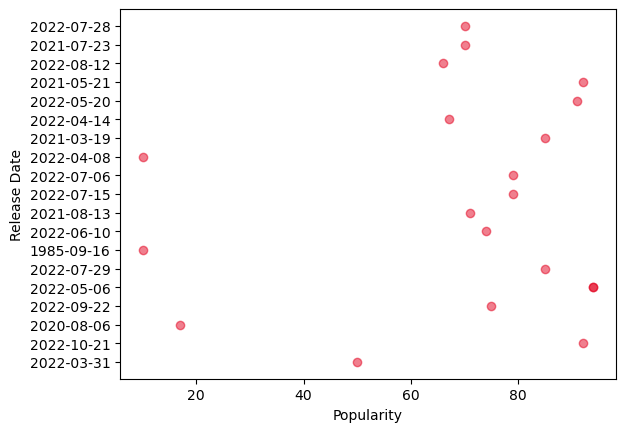

In [66]:
fig2, ax2 =  plt.subplots()
ax2.scatter( x = new_albums_popularity_df ['popularity'], 
             y = new_albums_popularity_df['release_date'],alpha= .5, color='#E3001E')

ax2.set_xlabel('Popularity')
ax2.set_ylabel('Release Date')
plt.show()

In [67]:
new_album_id = "151w1FgRZfnKZA9FEcg9Z3"

In [68]:
mid_album_url = 'https://api.spotify.com/v1/albums/{}/tracks'.format(new_album_id)


In [69]:
mid_album_response = requests.get(url = mid_album_url, headers = session_headers)
mid_album_response.status_code

200

In [70]:
mid_of_the_state = mid_album_response.json()

In [71]:
mid_df = pd.DataFrame(mid_of_the_state['items'])
mid_df.head()

,artists,available_markets,disc_number,duration_ms,explicit,external_urls,href,id,is_local,name,preview_url,track_number,type,uri
0,[{'external_urls': {'spotify': 'https://open.s...,"[AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, C...",1,202395,True,{'spotify': 'https://open.spotify.com/track/5j...,https://api.spotify.com/v1/tracks/5jQI2r1Rdgtu...,5jQI2r1RdgtuT8S3iG8zFC,False,Lavender Haze,None,1,track,spotify:track:5jQI2r1RdgtuT8S3iG8zFC
1,[{'external_urls': {'spotify': 'https://open.s...,"[AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, C...",1,218270,True,{'spotify': 'https://open.spotify.com/track/3e...,https://api.spotify.com/v1/tracks/3eX0NZfLtGzo...,3eX0NZfLtGzoLUxPNvRfqm,False,Maroon,None,2,track,spotify:track:3eX0NZfLtGzoLUxPNvRfqm
2,[{'external_urls': {'spotify': 'https://open.s...,"[AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, C...",1,200690,False,{'spotify': 'https://open.spotify.com/track/0V...,https://api.spotify.com/v1/tracks/0V3wPSX9ygBn...,0V3wPSX9ygBnCm8psDIegu,False,Anti-Hero,None,3,track,spotify:track:0V3wPSX9ygBnCm8psDIegu
3,[{'external_urls': {'spotify': 'https://open.s...,"[AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, C...",1,256124,True,{'spotify': 'https://open.spotify.com/track/1w...,https://api.spotify.com/v1/tracks/1wtOxkiel43c...,1wtOxkiel43cVs0Yux5Q4h,False,Snow On The Beach (feat. Lana Del Rey),None,4,track,spotify:track:1wtOxkiel43cVs0Yux5Q4h
4,[{'external_urls': {'spotify': 'https://open.s...,"[AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, C...",1,194206,False,{'spotify': 'https://open.spotify.com/track/4D...,https://api.spotify.com/v1/tracks/4D7BCuvgdJlY...,4D7BCuvgdJlYvlX5WlN54t,False,"You're On Your Own, Kid",None,5,track,spotify:track:4D7BCuvgdJlYvlX5WlN54t


In [72]:
mid_name_df= pd.DataFrame(mid_df [['name','id']])
mid_name_df.head()

,name,id
0,Lavender Haze,5jQI2r1RdgtuT8S3iG8zFC
1,Maroon,3eX0NZfLtGzoLUxPNvRfqm
2,Anti-Hero,0V3wPSX9ygBnCm8psDIegu
3,Snow On The Beach (feat. Lana Del Rey),1wtOxkiel43cVs0Yux5Q4h
4,"You're On Your Own, Kid",4D7BCuvgdJlYvlX5WlN54t


In [73]:
mid_audio_features = 'https://api.spotify.com/v1/audio-features?ids={}'\
.format(','.join(list(mid_df['id'])))

In [74]:
mid_features_response = requests.get(url = mid_audio_features , headers = session_headers)
mid_features_response.status_code

200

In [75]:
mid_features = mid_features_response.json()

In [76]:
mid_features_df = pd.DataFrame(mid_features['audio_features'])
mid_features_df.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.733,0.436,10,-10.489,1,0.0800,0.2580,0.000573,0.157,0.0976,96.985,audio_features,5jQI2r1RdgtuT8S3iG8zFC,spotify:track:5jQI2r1RdgtuT8S3iG8zFC,https://api.spotify.com/v1/tracks/5jQI2r1Rdgtu...,https://api.spotify.com/v1/audio-analysis/5jQI...,202396,4
1,0.637,0.398,7,-8.294,1,0.0564,0.0573,0.000001,0.101,0.0374,108.075,audio_features,3eX0NZfLtGzoLUxPNvRfqm,spotify:track:3eX0NZfLtGzoLUxPNvRfqm,https://api.spotify.com/v1/tracks/3eX0NZfLtGzo...,https://api.spotify.com/v1/audio-analysis/3eX0...,218271,4
2,0.637,0.643,4,-6.571,1,0.0519,0.1300,0.000002,0.142,0.5330,97.008,audio_features,0V3wPSX9ygBnCm8psDIegu,spotify:track:0V3wPSX9ygBnCm8psDIegu,https://api.spotify.com/v1/tracks/0V3wPSX9ygBn...,https://api.spotify.com/v1/audio-analysis/0V3w...,200690,4
3,0.663,0.319,9,-13.481,1,0.0375,0.6900,0.000993,0.117,0.1930,109.957,audio_features,1wtOxkiel43cVs0Yux5Q4h,spotify:track:1wtOxkiel43cVs0Yux5Q4h,https://api.spotify.com/v1/tracks/1wtOxkiel43c...,https://api.spotify.com/v1/audio-analysis/1wtO...,256124,4
4,0.696,0.396,2,-10.289,1,0.0656,0.4010,0.000005,0.125,0.3800,120.041,audio_features,4D7BCuvgdJlYvlX5WlN54t,spotify:track:4D7BCuvgdJlYvlX5WlN54t,https://api.spotify.com/v1/tracks/4D7BCuvgdJlY...,https://api.spotify.com/v1/audio-analysis/4D7B...,194207,4


In [77]:
mid_two_features_df= pd.DataFrame(mid_features_df[['danceability','speechiness','id']])
mid_two_features_df.head()

,danceability,speechiness,id
0,0.733,0.0800,5jQI2r1RdgtuT8S3iG8zFC
1,0.637,0.0564,3eX0NZfLtGzoLUxPNvRfqm
2,0.637,0.0519,0V3wPSX9ygBnCm8psDIegu
3,0.663,0.0375,1wtOxkiel43cVs0Yux5Q4h
4,0.696,0.0656,4D7BCuvgdJlYvlX5WlN54t


In [78]:
mid_final_df= pd.merge(mid_name_df, mid_two_features_df, how = 'inner', on = 'id')
mid_final_df.head()

,name,id,danceability,speechiness
0,Lavender Haze,5jQI2r1RdgtuT8S3iG8zFC,0.733,0.0800
1,Maroon,3eX0NZfLtGzoLUxPNvRfqm,0.637,0.0564
2,Anti-Hero,0V3wPSX9ygBnCm8psDIegu,0.637,0.0519
3,Snow On The Beach (feat. Lana Del Rey),1wtOxkiel43cVs0Yux5Q4h,0.663,0.0375
4,"You're On Your Own, Kid",4D7BCuvgdJlYvlX5WlN54t,0.696,0.0656


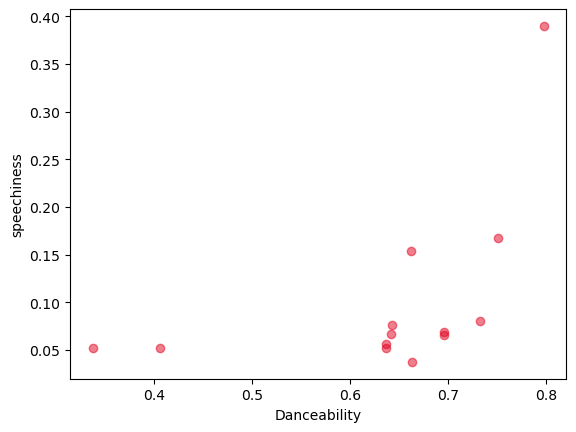

In [79]:
fig3, ax3 =  plt.subplots()
ax3.scatter( x = mid_final_df ['danceability'], 
             y = mid_final_df['speechiness'],alpha= .5, color='#E3001E' )

ax3.set_xlabel('Danceability')
ax3.set_ylabel('speechiness')
plt.show()

The graph below represents two albums together based on their danceability vs. speechiness to better understand their differences. 

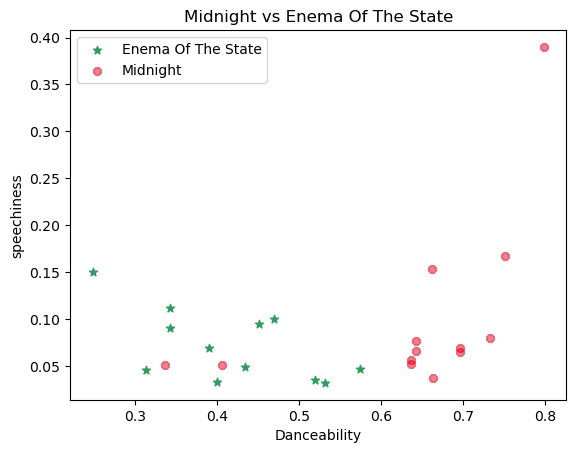

In [86]:
fig5, ax5 =  plt.subplots()
ax5.scatter( x = enema_final_df  ['danceability'], 
             y = enema_final_df ['speechiness'],
            label = 'Enema Of The State',
            color = '#2F9B61',
            marker ='*')
ax5.scatter( x = mid_final_df ['danceability'], 
             y = mid_final_df  ['speechiness'],
            label = 'Midnight',
            alpha= .5, 
            marker ='8',
           color = '#E3001E')

ax5.set_title('Midnight vs Enema Of The State')
ax5.set_xlabel('Danceability')
ax5.set_ylabel('speechiness')
ax5.legend()

plt.show()

Also, I compared the features separately between the two albums to get a clearer view of the relationship. 

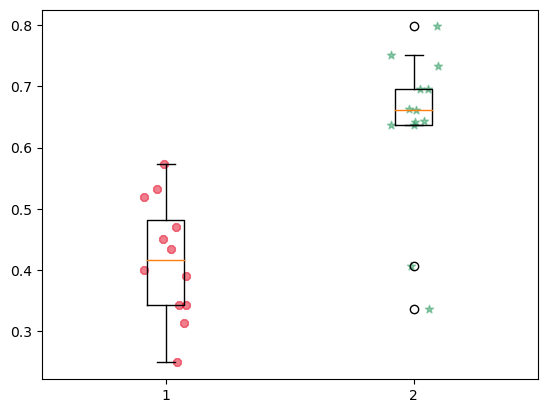

In [95]:
emena_speech= enema_final_df   ['danceability']
mid_speech = mid_final_df['danceability']

emena_ax = [1]*len(emena_speech)
mid_ax = [2]*len(mid_speech )

bur_x_jitter = np.random.uniform(-0.10,0.10,len (emena_ax))
chr_x_jitter = np.random.uniform(-0.10,0.10,len (mid_ax))

fig8, ax8=  plt.subplots()
ax8.boxplot(emena_speech,positions= [1])
ax8.boxplot(mid_speech,positions= [2])
ax8.scatter(emena_ax + bur_x_jitter, emena_speech, alpha=0.5, color='#E3001E', marker ='8')
ax8.scatter(mid_ax + chr_x_jitter, mid_speech, alpha=0.5, color='#2F9B61',marker ='*')


ax5.legend()
plt.show()


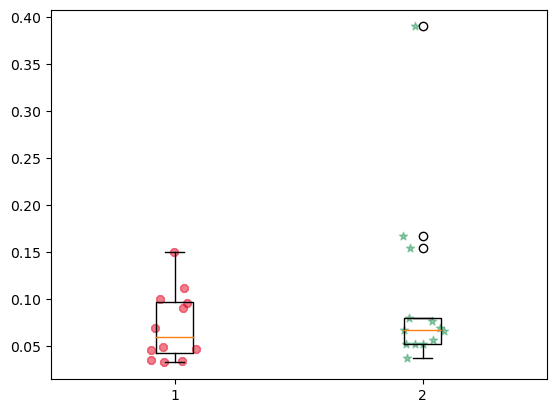

In [96]:
emena_speech= enema_final_df   ['speechiness']
mid_speech = mid_final_df['speechiness']

emena_ax = [1]*len(emena_speech)
mid_ax = [2]*len(mid_speech )

bur_x_jitter = np.random.uniform(-0.10,0.10,len (emena_ax))
chr_x_jitter = np.random.uniform(-0.10,0.10,len (mid_ax))

fig8, ax8=  plt.subplots()
ax8.boxplot(emena_speech,positions= [1])
ax8.boxplot(mid_speech,positions= [2])
ax8.scatter(emena_ax + bur_x_jitter, emena_speech, alpha=0.5, color='#E3001E', marker ='8', label='Aguilera')
ax8.scatter(mid_ax + chr_x_jitter, mid_speech, alpha=0.5, color='#2F9B61',marker ='*', label='Sia')
plt.show()